In [3]:
import pandas as pd

import sys
sys.path.append('..')  # Add parent directory to path
from model_pipeline import CreditScoringPipeline
from results_viewer import render_model_report, plot_aggregated_rocs, save_summary_csv

# 1. Load Processed Data

In [4]:
train_df = pd.read_csv('../data/processed/train_processed.csv')
val_df = pd.read_csv('../data/processed/val_processed.csv')
test_df = pd.read_csv('../data/processed/test_processed.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (149986, 25)
Validation set shape: (29998, 25)
Test set shape: (101500, 25)


# 2. Prepare Features and Target

In [5]:
X_train = train_df.drop('SeriousDlqin2yrs', axis=1)
y_train = train_df['SeriousDlqin2yrs']

X_val = val_df.drop('SeriousDlqin2yrs', axis=1)
y_val = val_df['SeriousDlqin2yrs']

# For test set, we don't have the target variable
X_test = test_df

# Combine train and val for final training
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_full: {X_full.shape}, y_full: {y_full.shape}")
print(f"X_test: {X_test.shape}")

X_train: (149986, 24), y_train: (149986,)
X_val: (29998, 24), y_val: (29998,)
X_full: (179984, 24), y_full: (179984,)
X_test: (101500, 25)


# 3. Initialize and run pipeline

In [6]:
# Create pipeline instance
pipeline = CreditScoringPipeline()

feature_names = X_train.columns.tolist()
pipeline.feature_names = feature_names

In [7]:
# Show available models
available_models = pipeline.get_available_models()
print("Available models:", list(available_models.keys()))

Available models: ['LogisticRegression', 'RandomForest', 'GradientBoosting', 'SVM', 'Bagging', 'KNN']


# 4. Train

## Logistic regression

In [9]:
# Logistic regression without SMOTE
pipeline.train_model("LogisticRegression", X_train, y_train, X_val, y_val, use_smote=False)

# Logistic regression with SMOTE
pipeline.train_model("LogisticRegression", X_train, y_train, X_val, y_val, use_smote=True)


Training LogisticRegression (use_smote=False)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
CV AUC: 0.8568
Validation AUC: 0.8646
Training LogisticRegression (use_smote=True)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
CV AUC: 0.8106
Validation AUC: 0.8198


,steps,"[('smote', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1



==== Results for model: LogisticRegression ====

--- no_smote ---
CV AUC: 0.8567503849479722
Validation AUC: 0.8645816423824516
Best params: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


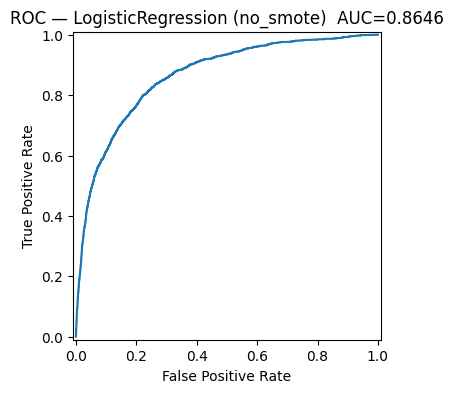

Confusion matrix:
[[22529  5464]
 [  484  1521]]

Classification report:
              precision    recall  f1-score   support

           0     0.9790    0.8048    0.8834     27993
           1     0.2178    0.7586    0.3384      2005

    accuracy                         0.8017     29998
   macro avg     0.5984    0.7817    0.6109     29998
weighted avg     0.9281    0.8017    0.8470     29998

Feature importance is not available for LogisticRegression (no_smote).


--- smote ---
CV AUC: 0.8105933516503515
Validation AUC: 0.8198346344690911
Best params: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


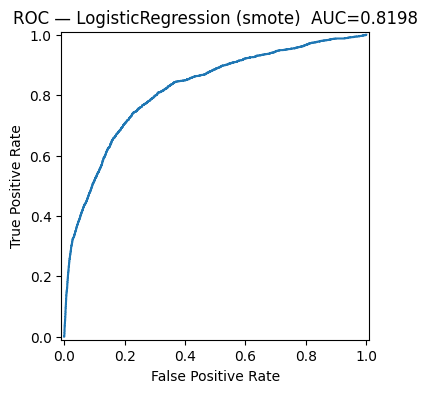

Confusion matrix:
[[27148   845]
 [ 1348   657]]

Classification report:
              precision    recall  f1-score   support

           0     0.9527    0.9698    0.9612     27993
           1     0.4374    0.3277    0.3747      2005

    accuracy                         0.9269     29998
   macro avg     0.6951    0.6487    0.6679     29998
weighted avg     0.9183    0.9269    0.9220     29998

Feature importance is not available for LogisticRegression (smote).




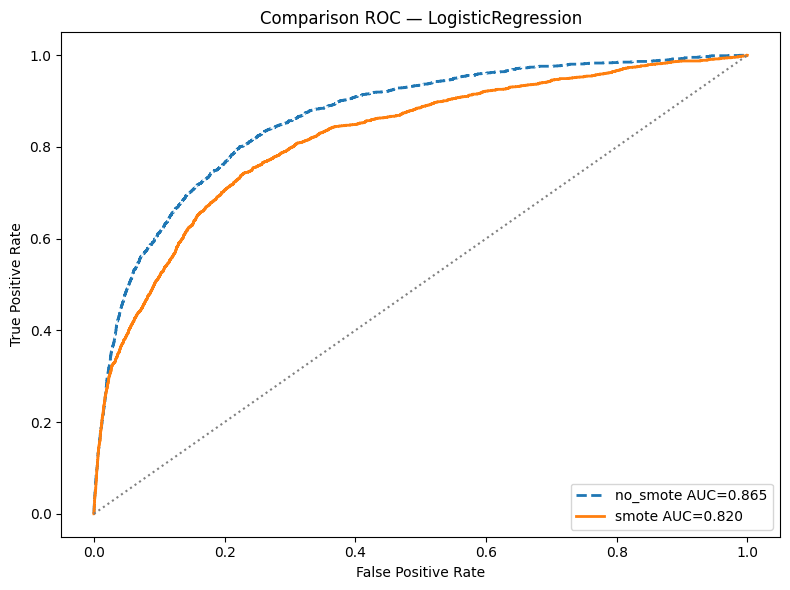

Saved comparison ROC to: models/LogisticRegression_comparison_roc.png


{'model': 'LogisticRegression',
 'runs': {'no_smote': {'cv_score': np.float64(0.8567503849479722),
   'val_score': 0.8645816423824516,
   'fit_time_sec': None,
   'best_params': {'logisticregression__C': 0.1,
    'logisticregression__penalty': 'l1',
    'logisticregression__solver': 'liblinear'}},
  'smote': {'cv_score': np.float64(0.8105933516503515),
   'val_score': 0.8198346344690911,
   'fit_time_sec': None,
   'best_params': {'logisticregression__C': 0.1,
    'logisticregression__penalty': 'l1',
    'logisticregression__solver': 'liblinear'}}},
 'roc_entries': [{'run': 'no_smote',
   'fpr': array([0.00000000e+00, 3.57232165e-05, 7.14464330e-05, ...,
          9.94677241e-01, 9.94784410e-01, 1.00000000e+00], shape=(3004,)),
   'tpr': array([0., 0., 0., ..., 1., 1., 1.], shape=(3004,)),
   'auc': 0.8645816423824516},
  {'run': 'smote',
   'fpr': array([0.00000000e+00, 3.57232165e-05, 3.57232165e-05, ...,
          9.99892830e-01, 1.00000000e+00, 1.00000000e+00], shape=(3177,)),
   '

In [10]:
# Detailed report for Logistic Regression
render_model_report(pipeline, "LogisticRegression", X_val, y_val)


## SVM

In [ ]:
# SVM without SMOTE
pipeline.train_model("SVM", X_train, y_train, X_val, y_val, use_smote=False)

# SVM with SMOTE
pipeline.train_model("SVM", X_train, y_train, X_val, y_val, use_smote=True)


In [ ]:
# Detailed report for SVM
render_model_report(pipeline, "SVM", X_val, y_val)

# KNN

In [ ]:
# KNN without SMOTE
pipeline.train_model("KNN", X_train, y_train, X_val, y_val, use_smote=False)

# KNN with SMOTE
pipeline.train_model("KNN", X_train, y_train, X_val, y_val, use_smote=True)

In [ ]:
# Detailed report for KNN
render_model_report(pipeline, "KNN", X_val, y_val)

## Bagging

In [ ]:
# Bagging without SMOTE
pipeline.train_model("Bagging", X_train, y_train, X_val, y_val, use_smote=False)

# Bagging with SMOTE
pipeline.train_model("Bagging", X_train, y_train, X_val, y_val, use_smote=True)

In [ ]:
# Detailed report for Bagging
render_model_report(pipeline, "KNN", X_val, y_val)

## Random forest

In [ ]:
# Random forest without SMOTE
pipeline.train_model("Random forest", X_train, y_train, X_val, y_val, use_smote=False)

# Random forest with SMOTE
pipeline.train_model("Random forest", X_train, y_train, X_val, y_val, use_smote=True)

In [ ]:
# Detailed report for Random forest
render_model_report(pipeline, "Random forest", X_val, y_val)

## GradientBoosting

In [ ]:
# GradientBoosting without SMOTE
pipeline.train_model("GradientBoosting", X_train, y_train, X_val, y_val, use_smote=False)

# GradientBoosting with SMOTE
pipeline.train_model("GradientBoosting", X_train, y_train, X_val, y_val, use_smote=True)

In [ ]:
# Detailed report for GradientBoosting
render_model_report(pipeline, "GradientBoosting", X_val, y_val)